In [66]:
import pandas as pd

In [67]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [68]:
%matplotlib inline
plt.style.use('ggplot') 

In [69]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [70]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [71]:
# Get length of stay from the icustays table
query = \
"""
select l.subject_id ,count(distinct(charttime)) as lab_time_count
    from mimiciii.labevents l
    group by l.subject_id
"""

data = pd.read_sql_query(query,con)

In [72]:
# Display the first few rows of the data
data.head(150)

,subject_id,lab_time_count
0,2,3
1,3,138
2,4,88
3,5,1
4,6,81
5,7,2
6,8,4
7,9,35
8,10,6
9,11,38


In [73]:
#diagnoses = data.plot.barh(y='lab_time_count', figsize=(5, 5), color='blue')

In [74]:
#plot = data.plot.pie(y='lab_time_count', figsize=(5, 5), legend=False, autopct='%1.1f%%')

In [75]:
Total = sum(data.lab_time_count)
print Total

2044412


In [76]:
data['lab_time_count'].mean()

44.201591282539134

In [77]:
data['lab_time_count'].median()

23.0

In [78]:
data['lab_time_count'].quantile([.1, .25, .5, .75, .9])

0.10      3.00
0.25      9.00
0.50     23.00
0.75     50.25
0.90    105.00
Name: lab_time_count, dtype: float64

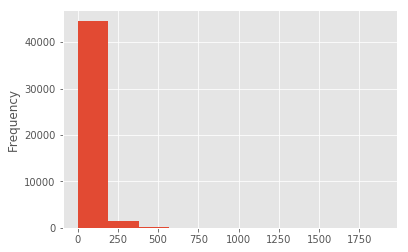

In [79]:
data.lab_time_count.plot(kind='hist')